In [54]:
import setup
from circuits import * 
from number import *
import math
import pandas as pd
import sympy as sp
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import numpy as np

In [55]:
def generate_dataset(xs, k):
    p = k # dimension of vector
    m = len(xs)
    ords = np.zeros((m,p), dtype=int)
    idx = np.zeros(m) 
    
    i=0
    for x in xs:
        for j in range(1,p):
            ords[i][j] = order(j, x)
            idx[i] = x
        t+=1
        print(i)
    return (ords, idx)

def prime_factors(n):
    i = 2
    factors = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors

def parity_2(x):
    if   (x==0 or x==-1):
        return 0
    x = int(np.abs(x))
    if ((x) % 2 == 1):
        return -1
    else:
        return 1

def rule_second(n):
    evenness = prime_factors(sp.totient(n)).count(2)
    if (evenness >= 4):
        return 1
    else:
        return -1
    
def _brute_kernel(x1,x2):
    return np.abs(K_ord[lookup[x1[0]]][lookup[x2[0]]])

def brute_kernel(X, Y):
    K = np.zeros((X.shape[0], Y.shape[0]))
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            K[i][j] = _brute_kernel(X[i], Y[j])

    return K

In [56]:
ords = pd.read_csv("./data_OF/ords100.csv")

In [57]:
ords = ords.set_index("Unnamed: 0")

In [58]:
ords_p = ords.applymap(parity_2)

In [59]:
ords_r = ords_p.reindex(abs(ords_p.apply(sum, axis=1)).sort_values(ascending=False).index)

In [60]:
K_ord = pairwise_kernels(ords_r, ords_r)

Text(0.5, 1.0, 'Kernel matrix of dataset sorted by \ndescending parity surplus')

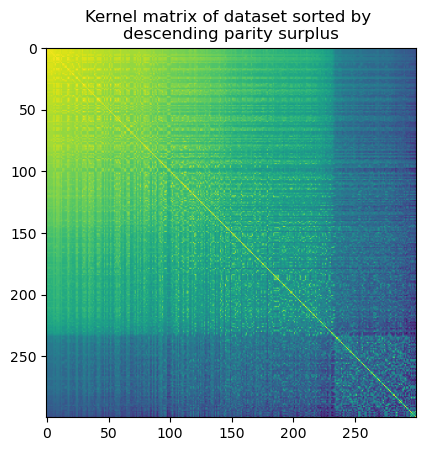

In [61]:
plt.imshow(abs(K_ord))
plt.title("Kernel matrix of dataset sorted by \ndescending parity surplus")

In [62]:
ords = ords.reindex(ords_r.index)

Text(0, 0.5, 'Number of unpaired even orders')

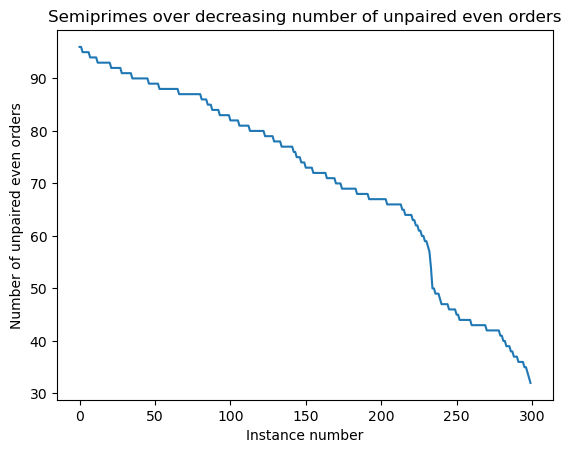

In [63]:
plt.plot(abs(ords_r.apply(sum, axis=1)).sort_values(ascending=False).values)
plt.title("Semiprimes over decreasing number of unpaired even orders")
plt.xlabel("Instance number")
plt.ylabel("Number of unpaired even orders")

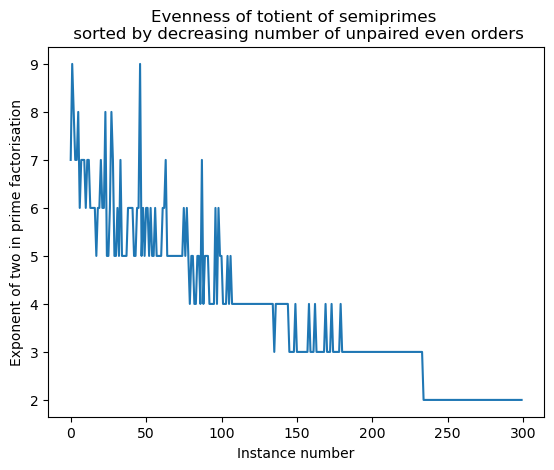

In [64]:

plt.title("Evenness of totient of semiprimes \n sorted by decreasing number of unpaired even orders")
plt.xlabel("Instance number")
plt.ylabel("Exponent of two in prime factorisation")

plt.plot([prime_factors(sp.totient(x)).count(2) for x in ords.index.values])

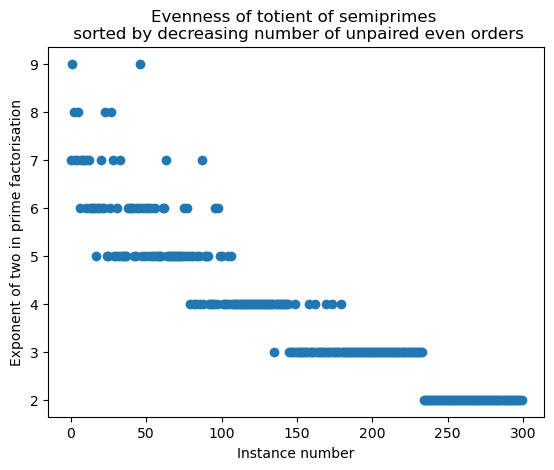

In [65]:

plt.title("Evenness of totient of semiprimes \n sorted by decreasing number of unpaired even orders")
plt.xlabel("Instance number")
plt.ylabel("Exponent of two in prime factorisation")

plt.scatter(x=range(len([prime_factors(sp.totient(x)).count(2) for x in ords.index.values])), y=[prime_factors(sp.totient(x)).count(2) for x in ords.index.values])

In [66]:
evenness = pd.read_csv("./data_OF/evenness_of_totient")

In [67]:
evenness = evenness.set_index("Unnamed: 0").values.reshape(22994)

In [68]:
np.unique(evenness, return_counts=True)

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       dtype=int64),
 array([5886, 6104, 4258, 2706, 1516, 1015,  633,  490,  220,   94,   40,
          18,    9,    4,    1], dtype=int64))

Text(0.5, 1.0, 'Evenness of totient functions in range (2,1000000)')

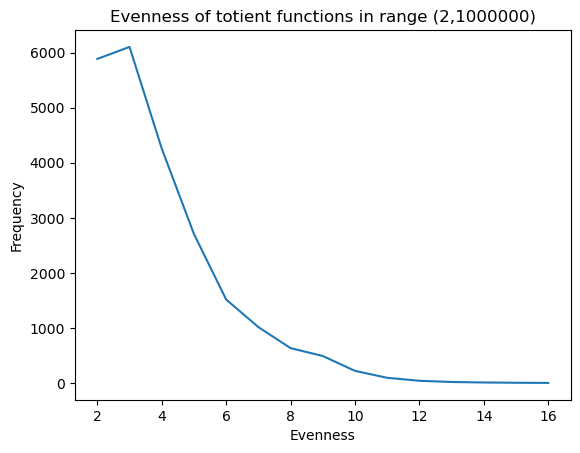

In [16]:
plt.plot(np.unique(evenness, return_counts=True)[0], np.unique(evenness, return_counts=True)[1])
plt.xlabel("Evenness")
plt.ylabel("Frequency")
plt.title("Evenness of totient functions in range (2,1000000)")

In [17]:
np.unique(evenness, return_counts=True)[1][:2].sum()

11990

In [18]:
np.unique(evenness, return_counts=True)[1][2:].sum()

11004

In [19]:
np.median(evenness) # Hence choose 3 for threshold

3.0

In [69]:
semiprimes_labels = [rule_second(x) for x in ords.index.values]

In [70]:
semiprimes_labels = np.array(semiprimes_labels)

In [71]:
args = semiprimes_labels.argsort()

In [72]:
semiprimes_labels = semiprimes_labels[args]

In [73]:
np.unique(semiprimes_labels, return_counts=True)

(array([-1,  1]), array([150, 150], dtype=int64))

In [74]:
idx_jumbled = ords.index.values[args]

In [75]:
ords_labelled = ords.reindex(idx_jumbled)

In [76]:
ords_p = ords_labelled.applymap(parity_2)

In [77]:
K_ord = pairwise_kernels(ords_p, ords_p)

In [78]:
pairwise_kernels([[1],[2]],[[1],[2]])

array([[1., 2.],
       [2., 4.]])

In [94]:
ords_p.shape

(300, 100)

In [104]:
np.mean(K_naive)

15037953.2944

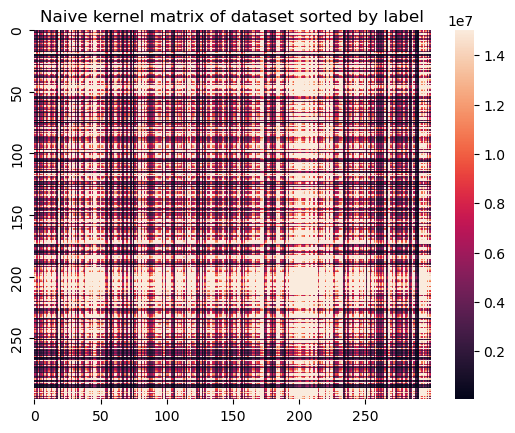

In [114]:
K_naive = pairwise_kernels(ords_p.index.values.reshape(-1,1), ords_p.index.values.reshape(-1,1))
sns.heatmap(abs(K_naive), xticklabels=50, yticklabels=50, vmax =15037953.2944)
plt.title("Naive kernel matrix of dataset sorted by label")
plt.savefig("./naive.png", dpi=300, bbox_inches="tight")

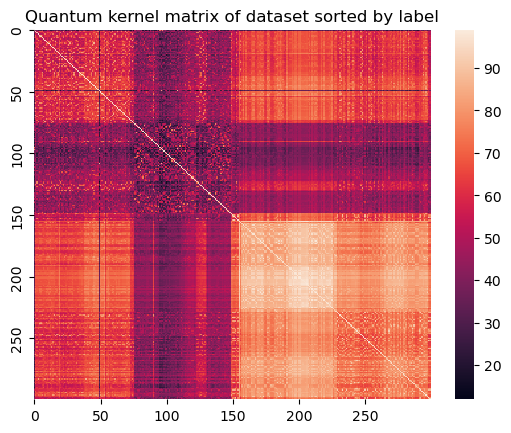

In [113]:
sns.heatmap(abs(K_ord), xticklabels=50, yticklabels=50)
plt.title("Quantum kernel matrix of dataset sorted by label")
plt.savefig("./heat.png", dpi=300, bbox_inches="tight")

In [31]:
lookup = dict(zip(ords_labelled.index.values,range(len(ords_labelled.index.values))))

In [110]:
scores_qke = []
for i in range(200):

    X_train, X_test, y_train, y_test = train_test_split(ords_labelled.index.values.reshape(-1,1), semiprimes_labels, test_size=0.33)

    clf = svm.SVC(kernel=brute_kernel)
    clf.fit(X_train, y_train)
    scores_qke.append(clf.score(X_test, y_test))


In [111]:
np.mean(scores_qke)

0.983232323232323

In [112]:
np.max(scores_qke)

1.0

In [113]:
np.min(scores_qke)

0.9191919191919192

In [114]:
scores_qke = pd.DataFrame(scores_qke)

In [115]:
scores_qke.columns = ["Quantum Kernel Estimator (SVM)"]

array([[<AxesSubplot:title={'center':'Quantum Kernel Estimator (SVM)'}>]],
      dtype=object)

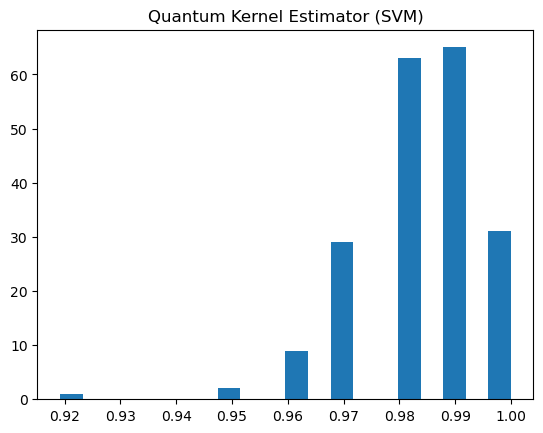

In [116]:
pd.DataFrame(scores_qke).hist(bins=20, grid=False)

In [117]:
scores_qke.to_csv("./data_OF/scores_quantum")

In [118]:
scores_qke = pd.read_csv("./data_OF/scores_quantum").set_index("Unnamed: 0")

In [119]:
scores_qke.columns = ["Quantum Kernel Estimator (SVM)"]

array([[<AxesSubplot:title={'center':'Quantum Kernel Estimator (SVM)'}>]],
      dtype=object)

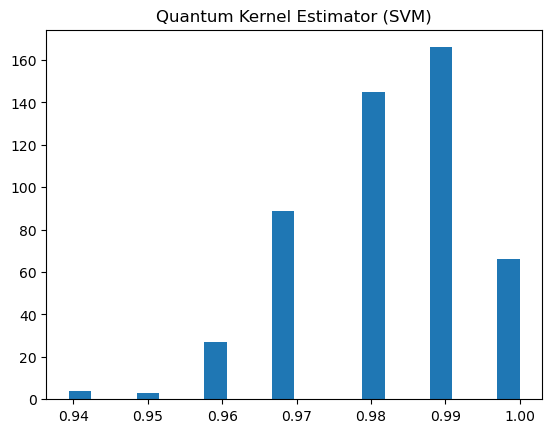

In [38]:
scores_qke.hist(bins=20, grid=False)

In [100]:
dim = 200

scores = np.zeros((4,dim))

for i in range(dim):

    X_train, X_test, y_train, y_test = train_test_split(ords_labelled.index.values.reshape(-1,1), semiprimes_labels, test_size=0.33)

    # Linear SVC
    clf = make_pipeline(StandardScaler(),
                        LinearSVC(random_state=0, tol=1e-5))
    clf.fit(X_train, y_train)
    scores[0][i] = clf.score(X_test, y_test)
    
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    scores[1][i] = clf.score(X_test, y_test)
    
    clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=10, max_iter=3000000).fit(X_train, y_train)
    scores[2][i] = clf.score(X_test, y_test)
    

    clf = RandomForestClassifier(max_depth=200, random_state=0)
    clf.fit(X_train, y_train)

    scores[3][i] = clf.score(X_test, y_test)

In [101]:
pd.DataFrame(scores).apply(np.mean, axis=1)

0    0.524949
1    0.495505
2    0.492879
3    0.463232
dtype: float64

In [92]:
pd.DataFrame(scores).apply(np.mean, axis=1)

0    0.517374
1    0.501212
2    0.490909
3    0.451919
dtype: float64

In [102]:
pd.DataFrame(scores).apply(np.max, axis=1)

0    0.626263
1    0.575758
2    0.616162
3    0.575758
dtype: float64

In [103]:
pd.DataFrame(scores).apply(np.min, axis=1)

0    0.353535
1    0.353535
2    0.353535
3    0.333333
dtype: float64

In [104]:
pd.DataFrame(scores).apply(np.std, axis=1)

0    0.044569
1    0.036965
2    0.040433
3    0.041068
dtype: float64

In [105]:
scores = pd.DataFrame(scores)

In [118]:
scores.to_csv("./data_OF/scores_classical")

In [86]:
scores = pd.read_csv("./data_OF/scores_classical").set_index("Unnamed: 0")

In [106]:
scores = scores.T

In [107]:
scores.columns = ["Linear SVM", "Logistic Regression", "Neural Network", "Random Forest"]

array([[<AxesSubplot:title={'center':'Linear SVM'}>,
        <AxesSubplot:title={'center':'Logistic Regression'}>],
       [<AxesSubplot:title={'center':'Neural Network'}>,
        <AxesSubplot:title={'center':'Random Forest'}>]], dtype=object)

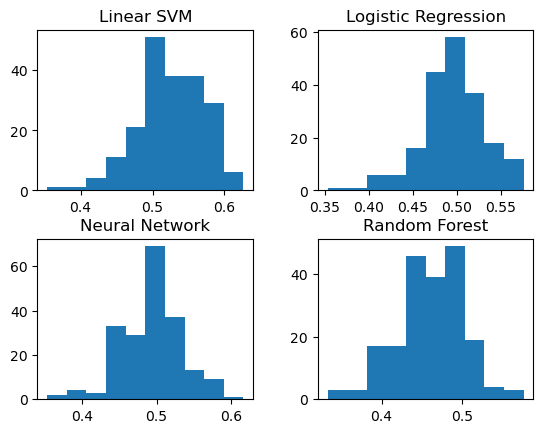

In [108]:
scores.hist(grid=False)

Text(0, 0.5, 'Frequency')

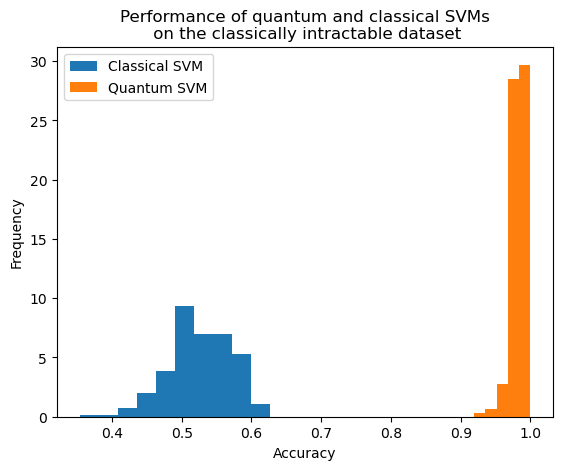

In [119]:
plt.hist(scores["Linear SVM"], label="Classical SVM", density=True, )
plt.hist(scores_qke["Quantum Kernel Estimator (SVM)"], label="Quantum SVM", bins=5, density=True)
plt.legend()
plt.title("Performance of quantum and classical SVMs\n on the classically intractable dataset")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

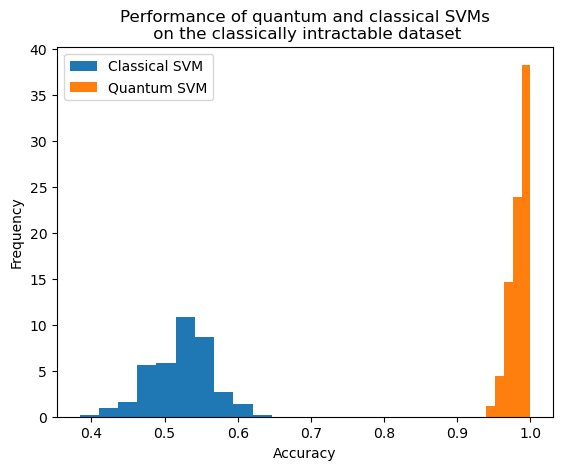

In [43]:
plt.hist(scores["Linear SVM"], label="Classical SVM", density=True)
plt.hist(scores_qke["Quantum Kernel Estimator (SVM)"], label="Quantum SVM", bins=5, density=True)
plt.legend()
plt.title("Performance of quantum and classical SVMs\n on the classically intractable dataset")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")

# Bootstrapping

In [166]:
print("hello")

hello


In [168]:
from sklearn.utils import resample

In [178]:
dim = 200

scores = np.zeros((4,dim))

X_train_1, X_test, y_train_1, y_test = train_test_split(ords_labelled.index.values.reshape(-1,1), semiprimes_labels, test_size=0.33)

for i in range(dim):
    X_train, y_train = resample(X_train_1, y_train_1, replace=True)

    # Linear SVC
    clf = make_pipeline(StandardScaler(),
                        LinearSVC(random_state=0, tol=1e-5))
    clf.fit(X_train, y_train)
    scores[0][i] = clf.score(X_test, y_test)
    
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    scores[1][i] = clf.score(X_test, y_test)
    
    clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=10, max_iter=3000000).fit(X_train, y_train)
    scores[2][i] = clf.score(X_test, y_test)

    clf = RandomForestClassifier(max_depth=200, random_state=0)
    clf.fit(X_train, y_train)

    scores[3][i] = clf.score(X_test, y_test)

<AxesSubplot:xlabel='0', ylabel='Density'>

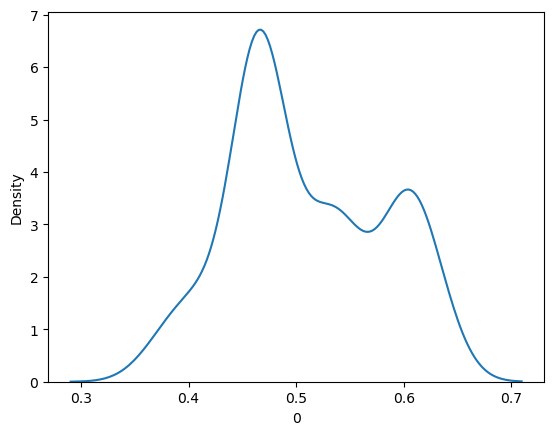

In [184]:
sns.kdeplot(pd.DataFrame(scores).T[0])

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

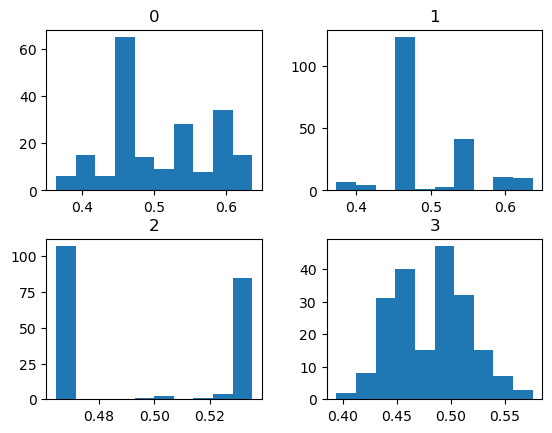

In [179]:
pd.DataFrame(scores).T.hist(grid=False)

## Back to old method

In [115]:
scores = pd.read_csv("./data_OF/scores_classical").set_index("Unnamed: 0")

In [116]:
scores = scores.T

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>],
       [<AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubplo

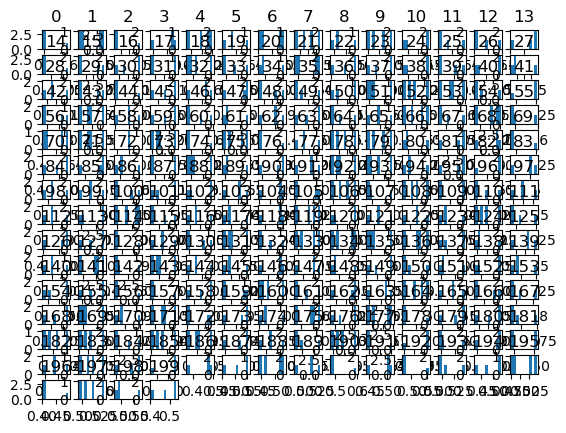

In [117]:
scores.hist(grid=False)

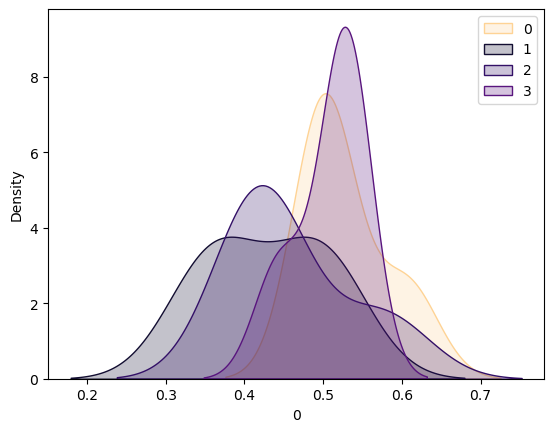

In [402]:
pd.DataFrame(scores.T).apply(np.mean, axis=1)

Linear SVM             0.524949
Logistic Regression    0.495505
Neural Network         0.492879
Random Forest          0.463232
dtype: float64

In [120]:
means = pd.DataFrame(scores.T).apply(np.mean, axis=1).values
stds =  pd.DataFrame(scores.T).apply(np.std, axis=1).values

In [121]:
classical_colours = colours[:4]

In [122]:
mean_all = np.mean(means)

In [123]:
mean_qke = scores_qke.mean().values[0]

In [124]:
mean_all

0.4941414141414141

In [ ]:
fig, ax = plt.subplots(nrows=2, figsize=(7,5), sharex= True, gridspec_kw={'height_ratios': [3, 1]})
plt.xlim(0.1,1)

ax[0].set_axisbelow(True)
ax[0].grid(color="lightgray", linestyle="--")


ax[0].set_title("Performance of quantum SVM against \n classical classifiers on the order-finding promise problem")
axes = []
for i,x in zip(range(4),  ["Linear SVM", "Logistic Regression", "Neural Network", "Random Forest"]):
    axes.append(sns.kdeplot(pd.DataFrame(scores).T[i], color=colours[1:][i], label="{}".format(x), fill=True, common_norm=True, ax=ax[0]))

axes.append(sns.kdeplot(scores_qke["Quantum Kernel Estimator (SVM)"], color=colours[-3], fill=True, common_norm=True, label = "Quantum SVM",ax=ax[0]))
ax[0].legend(loc='upper left')


ax[1].axvline(x=mean_all, ymin=0, ymax=1, color=colours[2], linestyle="--", alpha=0.6, label="$\mu_c$ = {:.2}".format(mean_all))
ax[1].axvline(x=mean_qke, ymin=0, ymax=1, color=colours[-3], linestyle="--", alpha=1, label="$\mu_q$ = {:.2}".format(mean_qke))
ax[1].legend(frameon=False)

              
ys = np.arange(1,5)
plt.xlabel("Accuracy")
ax[1].set_ylim(ys[0]-0.5, ys[-1]+1)
ax[1].errorbar(x = means, y=ys[::-1] , xerr = stds, fmt = ".", ecolor=colours[1:][:4], color=colours[0])
ax[1].errorbar(x = mean_qke, y = ys[2], xerr=scores_qke.std(), fmt = ".", ecolor=colours[-3], color=colours[0])
ax[1].set_yticks([])

for i in range(2):
    for axis in ['top','bottom','left','right']:
        ax[i].spines[axis].set_linewidth(1.5)   
    ax[i].tick_params(width=1.5)

plt.savefig("./supremacy.jpg", dpi=300)
plt.show()


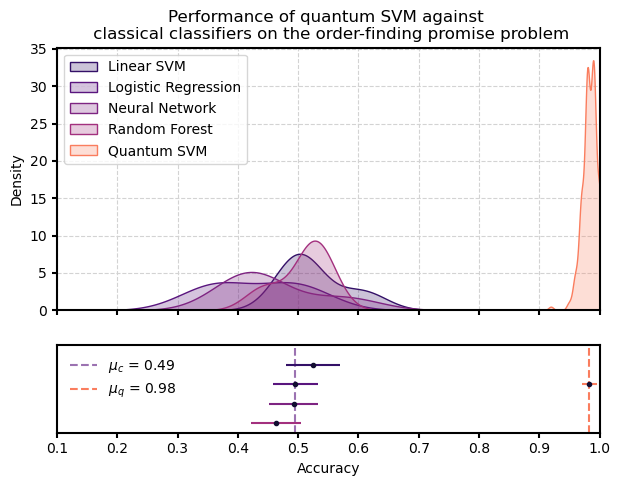

In [539]:
fig, ax = plt.subplots(nrows=2, figsize=(7,5), sharex= True, gridspec_kw={'height_ratios': [3, 1]})
plt.xlim(0.1,1)

ax[0].set_axisbelow(True)
ax[0].grid(color="lightgray", linestyle="--")


ax[0].set_title("Performance of quantum SVM against \n classical classifiers on the order-finding promise problem")
axes = []
for i,x in zip(range(4),  ["Linear SVM", "Logistic Regression", "Neural Network", "Random Forest"]):
    axes.append(sns.kdeplot(pd.DataFrame(scores).T[i], color=colours[1:][i], label="{}".format(x), fill=True, common_norm=True, ax=ax[0]))

axes.append(sns.kdeplot(scores_qke["Quantum Kernel Estimator (SVM)"], color=colours[-3], fill=True, common_norm=True, label = "Quantum SVM",ax=ax[0]))
ax[0].legend(loc='upper left')


ax[1].axvline(x=mean_all, ymin=0, ymax=1, color=colours[2], linestyle="--", alpha=0.6, label="$\mu_c$ = {:.2}".format(mean_all))
ax[1].axvline(x=mean_qke, ymin=0, ymax=1, color=colours[-3], linestyle="--", alpha=1, label="$\mu_q$ = {:.2}".format(mean_qke))
ax[1].legend(frameon=False)

              
ys = np.arange(1,5)
plt.xlabel("Accuracy")
ax[1].set_ylim(ys[0]-0.5, ys[-1]+1)
ax[1].errorbar(x = means, y=ys[::-1] , xerr = stds, fmt = ".", ecolor=colours[1:][:4], color=colours[0])
ax[1].errorbar(x = mean_qke, y = ys[2], xerr=scores_qke.std(), fmt = ".", ecolor=colours[-3], color=colours[0])
ax[1].set_yticks([])

for i in range(2):
    for axis in ['top','bottom','left','right']:
        ax[i].spines[axis].set_linewidth(1.5)   
    ax[i].tick_params(width=1.5)

plt.savefig("./supremacy.jpg", dpi=300)
plt.show()


In [270]:
def plot_axes(ax, fig=None, geometry=(1,1,1)):
    if fig is None:
        fig = plt.figure()
    ax = fig.axes.append(ax)
    return fig

In [281]:
fig = plt.figure()
fig.add_subplot(axes[0])

ValueError: The Subplot must have been created in the present figure

<Figure size 640x480 with 0 Axes>

In [276]:
fig = plot_axes(axes[0])

C:\Users\irnam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


<Figure size 640x480 with 0 Axes>

# Improving style of figures

In [81]:
import matplotlib as mpl
import seaborn as sns
import itertools

In [82]:
def get_magma_colors(n: int):
    """ return a color cycler with `n' unique colours. Use next(colors). """
    return get_colors('magma', n)


def get_colors(color: str, n: int):
    """ return a color cycler with `n' unique colours. Use next(colors). """
    plt.set_cmap(color)
    cy = mpl.cycler(color=sns.color_palette(color, n))
    colors = itertools.cycle(cy.by_key()['color'])
    return colors

In [83]:
N = 10

In [84]:
cycler = get_magma_colors(N)

<Figure size 640x480 with 0 Axes>

In [85]:
colours = []
for _ in range(N): colours.append(next(cycler))

Text(0, 0.5, 'Frequency')

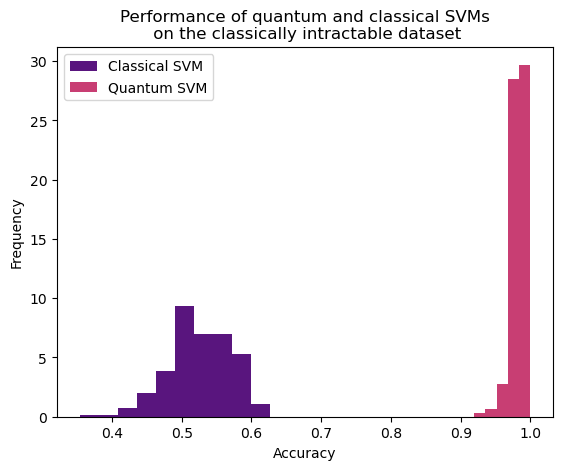

In [134]:
plt.hist(scores["Linear SVM"], label="Classical SVM", density=True, color = colours[2])
plt.hist(scores_qke["Quantum Kernel Estimator (SVM)"], label="Quantum SVM", bins=5, density=True, color= colours[-5])
plt.legend()
plt.title("Performance of quantum and classical SVMs\n on the classically intractable dataset")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")

In [139]:
X_train.max()

12317

In [140]:
X_train.min()

221

In [145]:
y_train

array([ 1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,
        1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,
        1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1,
        1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,
        1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1,
        1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,
        1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1,
        1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1])

In [154]:
y_train

array([ 1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,
        1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,
        1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1,
        1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,
        1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1,
        1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,
        1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1,
        1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1])

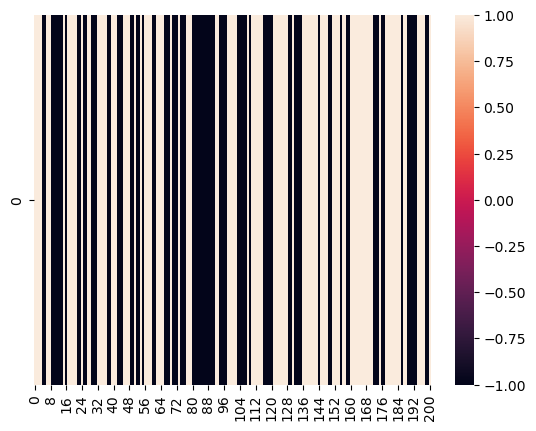

In [552]:
sns.heatmap(y_train[X_train.reshape(-1,).argsort()].reshape(1,-1))
plt.savefig("./barcode.png")

<AxesSubplot:>

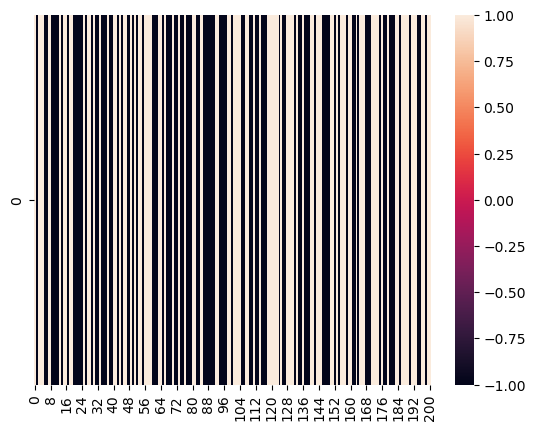

In [160]:
sns.heatmap(y_train[X_train.reshape(-1,).argsort()].reshape(1,-1))

In [ ]:
plt.plot(X_train

# A more informed dataset

In [4]:
semiprimes = [x*y for x in primes[10:] for y in primes[10:] if x>y] 

In [223]:
semiprimes[-1]

988027

In [224]:
semiprimes_labels = [rule_second(x) for x in semiprimes]

In [225]:
semiprimes_labels = np.array(semiprimes_labels)

In [226]:
args = semiprimes_labels.argsort()

In [227]:
semiprimes_labels = semiprimes_labels[args]

In [228]:
np.unique(semiprimes_labels, return_counts=True)

(array([-1,  1]), array([6601, 5802], dtype=int64))

In [229]:
semiprimes = np.array(semiprimes)[args]

In [230]:
l = len(semiprimes)

In [231]:
multiples = [j*sp.totient(i) for i,j in zip(semiprimes, np.random.randint(2,100, size=(l,)))]

In [232]:
dataset_multiple = np.concatenate([[semiprimes], [multiples]]).T

In [234]:
l

12403

In [233]:
dim = 50

scores = np.zeros((4,dim))

for i in range(dim):

    X_train, X_test, y_train, y_test = train_test_split(dataset_multiple, semiprimes_labels, test_size=0.33)

    # Linear SVC
    clf = make_pipeline(StandardScaler(),
                        LinearSVC(random_state=0, tol=1e-5))
    clf.fit(X_train, y_train)
    scores[0][i] = clf.score(X_test, y_test)
    
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    scores[1][i] = clf.score(X_test, y_test)
    
    clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=10, max_iter=3000000).fit(X_train, y_train)
    scores[2][i] = clf.score(X_test, y_test)
    

    clf = RandomForestClassifier(max_depth=200, random_state=0)
    clf.fit(X_train, y_train)

    scores[3][i] = clf.score(X_test, y_test)

C:\Users\irnam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\irnam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\irnam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\irnam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\irnam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\irnam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to conve

In [235]:
scores = pd.DataFrame(scores).T

In [236]:
scores.columns = ["Linear SVM", "Logistic Regression", "Neural Network", "Random Forest"]

array([[<AxesSubplot:title={'center':'Linear SVM'}>,
        <AxesSubplot:title={'center':'Logistic Regression'}>],
       [<AxesSubplot:title={'center':'Neural Network'}>,
        <AxesSubplot:title={'center':'Random Forest'}>]], dtype=object)

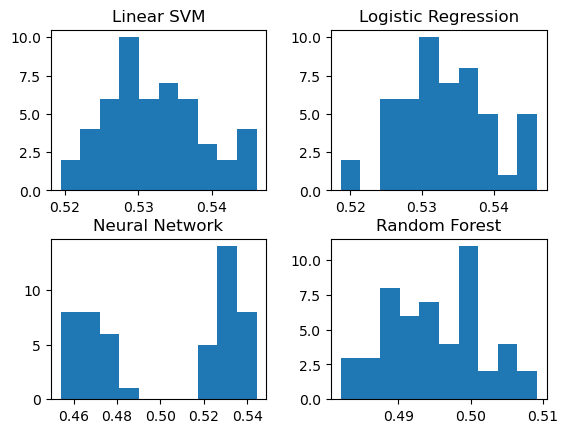

In [237]:
pd.DataFrame(scores).hist(grid=False)

In [548]:
sp.totient(primes[-1]*primes[-2])/(primes[-1]*primes[-2])

0.9979889213553881

# Order Statistics

In [3]:
# Accuracy of these two is not too different

def order_slow(x,N):
    assert(N>x)
    if(math.gcd(x,N)!=1):
        return -1
    for i in range(1,N+1):
        a = x
        for j in range(1,i):
            a = x*a % N
        if(a==1):
            return i


def order_fast(x,N):
    assert(N>x)
    if(math.gcd(x,N)!=1):
        return -1
    for i in range(1,N+1):
        if((x**i % N) == 1):
            return i
    

In [4]:
def get_factors(n):
    factors = []
    phi_n = n#sp.totient(n)
    for i in range(1, phi_n+1):
        if(phi_n%i==0):
            factors.append(i)
    return factors

In [7]:
def additive_order(x,N):
    assert(N>=x)
    for i in range(1,N+1):
        a = x
        if((a % N) ==0):
            return 1
        for j in range(1,i):
            a = (x + a) % N
        if(a==0):
            return i

In [474]:
additive_sigma = []
for i in range(1,51):
    additive_sigma.append(additive_order(i,50))

In [482]:
def alpha(n):
    return np.sum([i*sp.totient(i)/n for i in get_factors(n)])

In [503]:
np.random.sample(10)

array([0.71519923, 0.62820169, 0.69560886, 0.39537638, 0.94756995,
       0.77700907, 0.89021236, 0.86794403, 0.9882387 , 0.44404344])

In [546]:
semiprimes[0]

1147

In [553]:
sigma = []
for i in range(1,semiprimes[0]):
    sigma.append(order_slow(i,semiprimes[0]))
    
sigma_ = []
for i in range(1,semiprimes[0]):
    sigma_.append(order_fast(i,semiprimes[0]))

In [554]:
np.sum(np.array(sigma_) - np.array(sigma))

-8

In [773]:
for n in semiprimes[:4500]:
    if(n>1e4):
        continue
    print(n)
    sigma = []
    
    for i in np.random.choice(range(1,n), size=(10,), replace=False):
        sigma.append(order(i,n))
    sigma = [i for i in sigma if i!=-1]
    
    print("hello")
    print("{} <= {} <= {}".format(alpha(sp.reduced_totient(n)), np.mean(sigma), sp.reduced_totient(n)))

1147
hello
78.28333333333333 <= 71.4 <= 180
7099
hello
486.5184210526316 <= 595.8 <= 1140
9847
hello
711.5745614035088 <= 549.1 <= 1596
9761
hello
2408.1902654867254 <= 2847.6 <= 4746
8399
hello
2087.720501474926 <= 2678.1 <= 4068
7037
hello
1646.5300884955752 <= 1481.5555555555557 <= 3390
9827
hello
2102.4411392405063 <= 2038.2 <= 4740


In [594]:
def coprimes(n):
    cps = []
    for i in range(n):
        if(np.gcd(i,n)==1):
            cps.append(i)
    return cps

In [659]:
prime_factors(1403)

[23, 61]

In [697]:
ns = []
for n in semiprimes:
    if(n>0.2e4):
        continue
    facs = prime_factors(sp.totient(n))
    x = 0
    for i in coprimes(n):
        x += (order_fast(i,n)%2==1)
    print(n)
    ns.append(n)
    print(x)
    print(np.prod([i for i in facs if i!=2]))
    print(x== np.prod([i for i in facs if i!=2])) # Haven't proved the relation though for semiprime integers... What if it's false? 


1147
135
135
True
1891
225
225
True
1829
435
435
True
1333
315
315
True
1591
189
189
True
1457
345
345
True
1739
207
207
True
1643
196
195
False
1271
75
75
True
1517
45
45
True
1763
105
105
True
1927
115
115
True
1961
118
117
False


In [ ]:
n = 1633

In [797]:
n = (4*17+3)*(4*11+3)

In [798]:
n

3337

In [799]:
orders = np.zeros(len(coprimes(n)))
facs = prime_factors(sp.totient(n))

In [800]:
facs

[2, 2, 5, 7, 23]

In [801]:
for i,j in enumerate(coprimes(n)):
    orders[i] = order_fast(j,n)

In [802]:
sum(orders%2 == 1)/sp.totient(n)

0.25

In [818]:
prime_factors(sp.totient(semiprimes[100]))

[2, 2, 3, 11, 11, 293]

In [820]:
prime_factors(semiprimes[100])

[587, 727]

In [821]:
(587-3)/4

146.0

In [827]:
for i in semiprimes:
    if(prime_factors(sp.totient(i)).count(2)==2):
        facs = prime_factors(i)
        print((facs[0]-3)/4, (facs[1]-3)/4)
        print("\n")
        
        

179.0 181.0


172.0 181.0


170.0 181.0


164.0 181.0


161.0 181.0


160.0 181.0


157.0 181.0


154.0 181.0


151.0 181.0


149.0 181.0


70.0 181.0


67.0 181.0


65.0 181.0


62.0 181.0


59.0 181.0


56.0 181.0


55.0 181.0


52.0 181.0


49.0 181.0


47.0 181.0


44.0 181.0


41.0 181.0


40.0 181.0


37.0 181.0


34.0 181.0


32.0 181.0


31.0 181.0


26.0 181.0


25.0 181.0


76.0 181.0


77.0 181.0


82.0 181.0


146.0 181.0


142.0 181.0


140.0 181.0


136.0 181.0


130.0 181.0


125.0 181.0


124.0 181.0


122.0 181.0


121.0 181.0


119.0 181.0


116.0 181.0


115.0 181.0


110.0 181.0


109.0 181.0


107.0 181.0


104.0 181.0


95.0 181.0


94.0 181.0


91.0 181.0


89.0 181.0


86.0 181.0


172.0 184.0


170.0 184.0


164.0 184.0


161.0 184.0


160.0 184.0


157.0 184.0


154.0 184.0


151.0 184.0


149.0 184.0


146.0 184.0


142.0 184.0


140.0 184.0


136.0 184.0


130.0 184.0


125.0 184.0


124.0 184.0


122.0 184.0


121.0 184.0


119.0 184.0


116.0 184.0


115.0

In [822]:
(727-3)/4

181.0

In [754]:
for i,x in ords_p.iterrows():
    print(i)
    facs = prime_factors(sp.totient(i))
    print("By multiplication:", (1/2**facs.count(2))*(1-1/(np.prod([i for i in facs if i!=2]))))
    
    _, counts = np.unique(x, return_counts=True)
    print("By brute force:",    counts[0]/(counts[0]+counts[2]))
    
    print('\n')

1633
By multiplication: 0.24935064935064935
By brute force: 0.32978723404255317


1943
By multiplication: 0.12445887445887446
By brute force: 0.14736842105263157


923
By multiplication: 0.12380952380952381
By brute force: 0.13186813186813187


4087
By multiplication: 0.12474747474747475
By brute force: 0.15463917525773196


899
By multiplication: 0.12380952380952381
By brute force: 0.13978494623655913


1711
By multiplication: 0.12438423645320197
By brute force: 0.14736842105263157


2323
By multiplication: 0.12454545454545454
By brute force: 0.14736842105263157


871
By multiplication: 0.12373737373737374
By brute force: 0.13186813186813187


3599
By multiplication: 0.12471264367816091
By brute force: 0.15463917525773196


1739
By multiplication: 0.12439613526570048
By brute force: 0.14736842105263157


2507
By multiplication: 0.12457912457912458
By brute force: 0.14736842105263157


5123
By multiplication: 0.1247987117552335
By brute force: 0.15463917525773196


2479
By multiplicati

## Expected value of collisions

In [13]:
from sympy.utilities.iterables import multiset_permutations
n = 12
a = np.zeros(n, dtype=int)
for i in range(int(n/4)):
    a[i] = 1
sn = multiset_permutations(a)
sn_prod = []

In [14]:
for i in multiset_permutations(a):
    for j in multiset_permutations(a):
        sn_prod.append((i,j))

In [15]:
def collisions(x,y):
    return np.mean([0 if i==j else 1 for i,j in zip(x,y)])
    

In [22]:
overlap = np.asarray([collisions(x,y) for x,y in sn_prod])
x, counts = np.unique(overlap, return_counts=True)

In [23]:
np.mean(overlap)

0.37499999999999994

In [265]:
31/2**9

0.060546875

In [257]:
np.mean(overlap)

0.1171875

In [252]:
15/128

0.1171875

In [245]:
3/8

0.375

In [239]:
1-2*(np.mean(overlap))

0.5625

<BarContainer object of 4 artists>

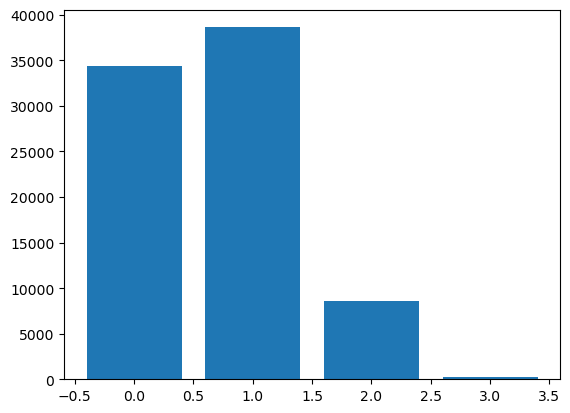

In [75]:
plt.bar(*np.unique(counts, return_counts=True))

In [42]:
def fermat(k):
    return 2**2**k+1

In [45]:
fermat(4)

65537

In [43]:
fermat(4)

65537

In [32]:
sp.totient(65537*257)/(65537*257)

0.9960937502319211

In [ ]:
for j in range(1,5):
    for k in range(1,j):
        print(j,k)
        for i in range(1,1000):
            if(np.gcd(i,fermat(j)*fermat(k))!=1):
                print(i)
    print("\n")



2 1
5
10
15
17
20
25
30
34
35
40
45
50
51
55
60
65
68
70
75
80
85
90
95
100
102
105
110
115
119
120
125
130
135
136
140
145
150
153
155
160
165
170
175
180
185
187
190
195
200
204
205
210
215
220
221
225
230
235
238
240
245
250
255
260
265
270
272
275
280
285
289
290
295
300
305
306
310
315
320
323
325
330
335
340
345
350
355
357
360
365
370
374
375
380
385
390
391
395
400
405
408
410
415
420
425
430
435
440
442
445
450
455
459
460
465
470
475
476
480
485
490
493
495
500
505
510
515
520
525
527
530
535
540
544
545
550
555
560
561
565
570
575
578
580
585
590
595
600
605
610
612
615
620
625
629
630
635
640
645
646
650
655
660
663
665
670
675
680
685
690
695
697
700
705
710
714
715
720
725
730
731
735
740
745
748
750
755
760
765
770
775
780
782
785
790
795
799
800
805
810
815
816
820
825
830
833
835
840
845
850
855
860
865
867
870
875
880
884
885
890
895
900
901
905
910
915
918
920
925
930
935
940
945
950
952
955
960
965
969
970
975
980
985
986
990
995


3 1
5
10
15
20
25
30
35
40
45
50

In [59]:
semiprimes = [x*y for x in primes[10:] for y in primes[10:] if x>y] 

In [ ]:
for i

In [10]:
prime_factors(sp.totient(1147))

[2, 2, 2, 3, 3, 3, 5]

In [11]:
3*3*3*5

135

In [12]:
ns = []
for n in semiprimes:
    if(n>0.2e4):
        continue
    facs = prime_factors(sp.totient(n))
    x = 0
    for i in coprimes(n):
        x += (order_fast(i,n)%2==1)
    print(n)
    ns.append(n)
    print(x)
    print(np.prod([i for i in facs if i!=2]))
    print(x== np.prod([i for i in facs if i!=2])) # Haven't proved the relation though for semiprime integers... What if it's false? 


1147
135
135
True
1271
75
75
True
1517
45
45
True
1333
315
315
True
1591
189
189
True
1763
105
105
True
1457
345
345
True
1739
207
207
True
1927
115
115
True
1643
195
195
True
1961
117
117
True
1829
435
435
True
1891
225
225
True


In [6]:
prime_factors(52)

[2, 2, 13]

In [7]:
sp.totient(52)

24

In [8]:
sp.totient(35)

24

In [11]:
for i in range(1, 21):
    if(2**i % 21 == 1):
        print(i)

6
12
18


In [16]:
20**2 % 21

1

In [17]:
2**3 % 21

8

In [31]:
3*5

15

In [64]:
x = 117 

In [65]:
lol = []
for i in coprimes(x):
    m = order(i,x)
    if((m % 2) == 1):
        lol.append((i, m))

In [67]:
len(lol)

9

In [69]:
prime_factors(sp.totient(117))

[2, 2, 2, 3, 3]

In [70]:
(1/8)*72

9.0

In [58]:
def generate(x, n):
    s = {x}
    a = x
    for i in range(order(x,n)):
        s = s | {x**i % n}
    return s

In [59]:
generate(23,77)

{1, 23, 67}

In [61]:
generate(36, 77)

{1, 15, 36, 64, 71}

In [62]:
72/12

6.0

In [63]:
prime_factors(117)

[3, 3, 13]

In [71]:
sp.totient(108)

36

In [73]:
prime_factors(108)

[2, 2, 3, 3, 3]

In [72]:
prime_factors(36)

[2, 2, 3, 3]

# Order statistics again

In [21]:
primes[-1]

997

In [40]:
p = primes[40]
phi = sp.totient(p)

ords = []

for i in coprimes(p):
    ords.append(order_fast(i,p))

ords = np.array(ords)
print(np.unique(ords, return_counts=True)[1])
print(np.unique(ords, return_counts=True)[0])

print(np.array([sp.totient(o) for o in np.unique(ords, return_counts=True)[0]]))
np.median(ords)

[ 1  1 88 88]
[  1   2  89 178]
[ 1  1 88 88]


89.0

In [38]:
1+1+2+3+28+28+56

119

In [48]:
a = []
for i in coprimes(35):
    a.append((i**2 * 2) % 35)
a = set(a)

In [49]:
a

{2, 8, 18, 22, 23, 32}

# Generating all subgroups

In [110]:
def gen_group(S,n):
    Q = S.copy()
    H = []
    Q.append(1)
    while len(Q)>0:
        x = Q.pop(0)
        if (x in H):
            continue
        H.append(x)
        for i in S:
            Q.append(x*i % n)
    
    return H


In [128]:
set(gen_group([1,2,7],15))

{1, 2, 4, 7, 8, 11, 13, 14}

In [117]:
sp.totient(15)

8

In [125]:
{2,3} | {3,2}

{2, 3}

In [133]:
{2,3} == {3,2}

True

In [147]:
set([frozenset([])]) 

{frozenset()}

In [171]:
import itertools
n = 21
xs = coprimes(n)
S = set([(frozenset([1]), 1)]) 


# https://math.stackexchange.com/questions/1758649/an-algorithm-to-find-a-subgroup-generated-by-a-subset-of-a-finite-group

for i in range(0, len(xs) + 1):  # to get all lengths: 0 to 3
    for subset in itertools.combinations(xs, i):
        s = frozenset(gen_group(list(subset), n))
        S = S | set([(s, len(s))])

In [173]:
sp.totient(21)

12

In [174]:
4*3

12

In [172]:
S

{(frozenset({1}), 1),
 (frozenset({1, 8}), 2),
 (frozenset({1, 4, 16}), 3),
 (frozenset({1, 2, 4, 8, 11, 16}), 6),
 (frozenset({1, 13}), 2),
 (frozenset({1, 4, 10, 13, 16, 19}), 6),
 (frozenset({1, 20}), 2),
 (frozenset({1, 8, 13, 20}), 4),
 (frozenset({1, 4, 5, 16, 17, 20}), 6),
 (frozenset({1, 2, 4, 5, 8, 10, 11, 13, 16, 17, 19, 20}), 12)}

In [18]:
for i in coprimes(21):
    print(i, (i, 21))

1 1
2 30
3 30
4 15
5 30
6 10
8 10
9 15
10 6
12 6
13 10
15 5
16 15
17 30
18 30
19 30
20 10
23 3
24 30
25 15
26 30
27 10
29 10
30 30
31 30
32 6
34 2
36 5
37 15
38 30
39 30
40 30
41 10
43 2
45 6
46 30
47 30
48 10
50 10
51 30
52 30
53 15
54 6
57 10
58 15
59 30
60 15
61 30
62 10
64 5
65 6
67 3
68 30
69 10
71 5
72 30
73 30
74 30
75 30
76 2
